# Final project
### Tianhan Ling 46889231

#### Dataset Downloading:
For the csv format data (both training and test datasets), please download from https://www.kaggle.com/oddrationale/mnist-in-csv

where the original data is from http://yann.lecun.com/exdb/mnist/.


#### Task 1: Loading the data (2 pts)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
mnist_train = pd.read_csv('mnist_train.csv') # 60,000
mnist_test = pd.read_csv('mnist_test.csv')   # 10,000

In [6]:
import numpy as np
X_train = mnist_train.drop(['label'],axis=1).to_numpy()
y_train = mnist_train['label'].to_numpy()
X_test = mnist_test.drop(['label'],axis=1).to_numpy()
y_test = mnist_test['label'].to_numpy()

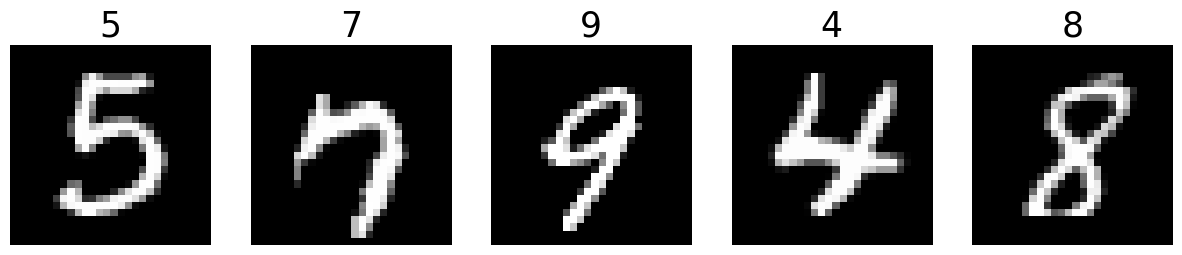

In [7]:
_, axes = plt.subplots(1,5, figsize=(15, 12))
axes = axes.reshape(-1) 

idx = np.random.choice(60000, size=5)

for i in range(5):
    axes[i].axis('off') # hide the axes
    axes[i].imshow(X_train[idx[i],:].reshape(28,28), cmap = 'gray')      # display as 28x28 grayscale image
    axes[i].set_title(str(y_train[idx[i]]), color= 'black', fontsize=25) # title is label
plt.show()

#### Task 2: Logistic Regression (5pts)

In [8]:
import numpy as np

class myLogisticRegression_mulclass():
    """ Logistic Regression classifier
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    """
    def __init__(self, learning_rate=1e-5):
        '''init(self, learning_rate=le-5)
        initialized self'''
        # learning rate can also be in the fit method
        self.learning_rate = learning_rate
        

    def fit(self, data, y, n_iterations = 1000):
        """ 
        fit(self,X-train,y-train,n_iterations=1000)
        fit the model with X
        """
        X = data
        N,p = data.shape    # N=60000 images, p=784 features
        K = 10 
        
        W=np.random.random(size=(p,K))*1e-4 # initialize beta, can be other choices
        
        eta = 1e-5  # step size (learning rate)
        num_steps = 10
        
        import tqdm.notebook

        print("Initial loss is: ", self.loss(W,X_train,y_train))
        for i in tqdm.notebook.tqdm(range(num_steps)):
            dW = self.gradient_loss(W,X_train,y_train)
            W -= eta * dW
            print("Loss after", i+1,"iterations is: ", self.loss(W,X_train,y_train))
        
        self.coeff = W

    def predict(self,X,y):
        '''predict(self,X-test ,y)
        predict y-test by model using X-test'''
        W=self.coeff
        probs = self.model(X,W)     # (N,K)
        predicted_labels = np.argmax(probs, axis=1)
        return predicted_labels
    
    
    def accuracy(self,X,y):
        '''accuracy(self,X-test,y-test)
        using predict test the accuracy of the model'''
        W=self.coeff
        probs = self.model(X,W)     # (N,K)
        predicted_labels = np.argmax(probs, axis=1) # returns indices of maximum element in each column
        # now calculate how many are correct
        return np.mean(predicted_labels == y)

    def model(self,X,W):
        '''model(self,X,W)
        X input is (N,p) samples matrix of N samples with m features.
       W input is (p,K) weights matrix with m weights for each of K classes.
       
       output: shape (N, K) array, i-th row represent the probabilities of i-th sample'''
        s = np.exp(np.matmul(X,W))
    
        # Add up each row (K) elements and reshape to column vector to be able to divide
        total = np.sum(s, axis=1).reshape(-1,1)
        return s/total

    def loss(self,W,X,y,K=10):
        '''loss(self,W,X,y,K=10)
        the loss function'''
        N = len(y)
        loss_components = np.zeros(N)
        # model output is shape (N,K), so loop through columns (sum over k),
        # pick out terms where y==k, and add them up
        log_L_of_W = np.log(self.model(X,W)) # evaluate L only once
        for k in range(K):
            loss_components += log_L_of_W[:,k]*(y == k) # y==k is same as the componentwise Kronecker delta
        return -np.mean(loss_components)
    
    def gradient_loss(self,W,X,y,K=10):
        '''gradient_less(self,W,X,y,K=10)
        how far way is our model prediction from y for each class
        W input is (p,K) weights matrix with p weights for each of K classes.
        X input is (N,p) matrix of N samples, each with m features.
        y input is (N,) list of class labels for each of the N samples.
       
        output is (p,K) weight update matrix for gradient descent.'''
        m=X.shape[1]

        # dLdW has K columns, each column is the gradient of L wrt w_k
        dLdW = np.zeros((m,K))
        L_of_W = self.model(X,W)  # evaluate L only once
        for k in range(K):
            # model output is shape (N,K); single column is (N,), so reshape into
            # column vector to multiply by X for (N,m) output
            dLdWk =(L_of_W[:,k] - (y==k)).reshape(-1,1)*X
            # take mean along rows to get (m,) output
            dLdW[:,k] = np.mean(dLdWk, axis=0)
        return dLdW

In [9]:
lg = myLogisticRegression_mulclass()
lg.fit(X_train,y_train)
lg.accuracy(X_test,y_test)

Initial loss is:  2.304827203591601


  0%|          | 0/10 [00:00<?, ?it/s]

Loss after 1 iterations is:  1.7184720018429076
Loss after 2 iterations is:  1.3875622366508535
Loss after 3 iterations is:  1.200559653816858
Loss after 4 iterations is:  1.1237150802260771
Loss after 5 iterations is:  1.0015962530501579
Loss after 6 iterations is:  0.9601746987314499
Loss after 7 iterations is:  0.8766424665556535
Loss after 8 iterations is:  0.8381265351168307
Loss after 9 iterations is:  0.781479904017394
Loss after 10 iterations is:  0.7546134548508822


0.8192

#### Task 3: Principle Component Analysis (5 pts)

In [10]:
import numpy as np

class myPCA():
    '''Principle Component Analysis
    Parameters:
    -----------
    n_components: int
    '''
    
    def __init__(self, n_components = 2):
        '''init__(self, n_components= 2) 
        initialize self'''
        self.n_c = n_components
    
    
    def fit(self,X):
        '''fit(self, X, y=None) 
        Fit the model with X'''
        cov_mat = np.cov(X.T) # covariance matrix, the input matrix to this function does not need to be centered
        eig_val, eig_vec = np.linalg.eigh(cov_mat) #eigen-values and orthogonal eigen-vectors --ascending order
        eig_val = np.flip(eig_val) # reverse the order --descending
        eig_vec = np.flip(eig_vec,axis=1) # reverse the order
        self.eig_values = eig_val[:self.n_c] # select the top eigen-vals
        self.principle_components = eig_vec[:,:self.n_c] # select the top eigen-vecs
        self.variance_ratio = self.eig_values/eig_val.sum() # variance explained by each PC
    
    def transform(self,X):
        '''transform(self, X) 
        Apply the dimensionality reduction on X'''
        return np.matmul(X-X.mean(axis = 0),self.principle_components) #project the data (centered) on PCs

In [11]:
pca = myPCA(n_components = 2)
pca.fit(X_test)
X_pca = pca.transform(X_test)

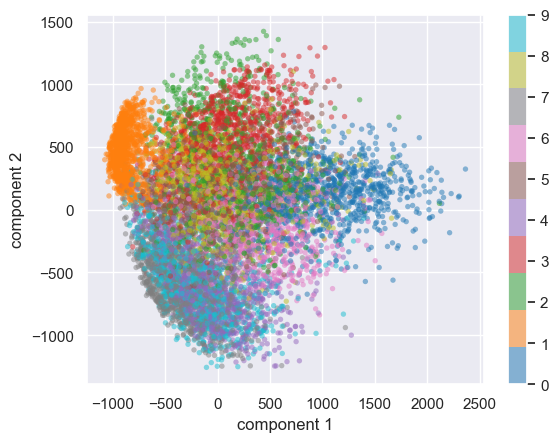

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

#### Task 4: Try other methods by calling function in existing Python packages, including Scikit-Learn. (6 pts)

### kNN(KNeighborsClassifier)(supervised)

**Mathematical Description**: 

Given a test sample $\mathbf{x}$ from **test** dataset, the kNN classifier first identifies the neighbors $k$ points in the **training** data that are closest to $\mathbf{x}$, whose indices are represented by $\mathcal{N}_{x}$. It then estimates the probability that $\mathbf{x}$ belongs to class $j$ by $P\big(y= j| \mathbf{x} \big)$ computing the fraction of points in $\mathcal{N}$ whose label(s) actually equal $j$:

$$
P\big(y= j| \mathbf{x} \big)\approx  \frac{1}{k} \sum_{i\in \mathcal{N}_{x}} 1\{ y^{(i)} = j\}.
$$

We finally determine its class by picking up the class with largest probability.

**Algorithm:**

'ball_tree' will use :class:`BallTree`

'kd_tree' will use :class:`KDTree`

'brute' will use a brute-force search.

'auto' will attempt to decide the most appropriate algorithm based on the values passed to :`fit` method.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test,y_test)

### Random Forest(supervised)
The each decision tree can be "random" (therefore different with each other) in two ways:
    - In each run, we only pick up a random subset of features as training dataset
    - In each run, we only pick up a random subset of samples as training dataset
    

The training algorithm for random forests applies the general technique of bootstrap aggregating, or bagging, to tree learners. Given a training set X = $x_1$, ..., $x_n$ with responses Y = $y_1$, ..., $y_n$, bagging repeatedly (B times) selects a random sample with replacement of the training set and fits trees to these samples:

For b = 1, ..., B:

1. Sample, with replacement, n training examples from X, Y; call these $X_b$, $Y_b$.
2. Train a classification or regression tree $f_b$ on $X_b$, $Y_b$.

After training, predictions for unseen samples x' can be made by averaging the predictions from all the individual regression trees on x':
$$
{\displaystyle {\hat {f}}={\frac {1}{B}}\sum _{b=1}^{B}f_{b}(x')}{\displaystyle {\hat {f}}={\frac {1}{B}}\sum _{b=1}^{B}f_{b}(x')}
$$
or by taking the majority vote in the case of classification trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier() 
rf_clf.fit(X_train, y_train) 
rf_clf.score(X_test, y_test)

### Isomap(unsupervised)
Following the connection between the classical scaling and PCA, metric MDS can be interpreted as kernel PCA. In a similar manner, the geodesic distance matrix in Isomap can be viewed as a kernel matrix. The doubly centered geodesic distance matrix K in Isomap is of the form

$${\displaystyle K=-{\frac {1}{2}}HD^{2}H\,}{\displaystyle K=-{\frac {1}{2}}HD^{2}H\,}$$

where $${\displaystyle D^{2}=D_{ij}^{2}:=(D_{ij})^{2}}D^{2}=D_{{ij}}^{2}:=(D_{{ij}})^{2} $$is the elementwise square of the geodesic distance matrix D = [Dij], H is the centering matrix, given by

$${\displaystyle H=I_{n}-{\frac {1}{N}}e_{N}e_{N}^{T},\quad {\text{where }}e_{N}=[1\ \dots \ 1]^{T}\in \mathbb {R} ^{N}.}H=I_{n}-{\frac  {1}{N}}e_{N}e_{N}^{T},\quad {\text{where }}e_{N}=[1\ \dots \ 1]^{T}\in {\mathbb  {R}}^{N}.$$

Algorism:

A very high-level description of Isomap algorithm is given below.

##### Determine the neighbors of each point.

 ·All points in some fixed radius.
 
 ·K nearest neighbors.
 
##### Construct a neighborhood graph.

 ·Each point is connected to other if it is a K nearest neighbor.
 
 ·Edge length equal to Euclidean distance.
 
##### Compute shortest path between two nodes.

 ·Dijkstra's algorithm
 
 ·Floyd–Warshall algorithm
 
##### Compute lower-dimensional embedding.

 ·Multidimensional scaling

In [ ]:
from sklearn.manifold import Isomap
isomap = Isomap(n_jobs = -1)
X_isomap = isomap.fit_transform(X_test)


import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_isomap[:, 0], X_isomap[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('ISOMAP 1')
plt.ylabel('ISOMAP 2')
plt.colorbar();

By comparing supervised methods. Random forest has the highest accuracy on the Mnist dataset. 